In [61]:
import keras.models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#now we load the train_X, train_Y, test_X and test_Y datasets for binary NN
train_X=pd.read_csv('NSLKDD_train_preprocessed_normalized.csv')
test_X=pd.read_csv('NSLKDD_test_preprocessed_normalized.csv')
train_Y=pd.read_csv('NSLKDD_train_Y.csv')
test_Y=pd.read_csv('NSLKDD_test_Y.csv')

In [2]:
#drop the first columns because they are the ID
train_X=train_X.drop('Unnamed: 0', axis=1)
train_Y=train_Y.drop('Unnamed: 0', axis=1)
test_Y=test_Y.drop('Unnamed: 0', axis=1)
test_X=test_X.drop('Unnamed: 0', axis=1)

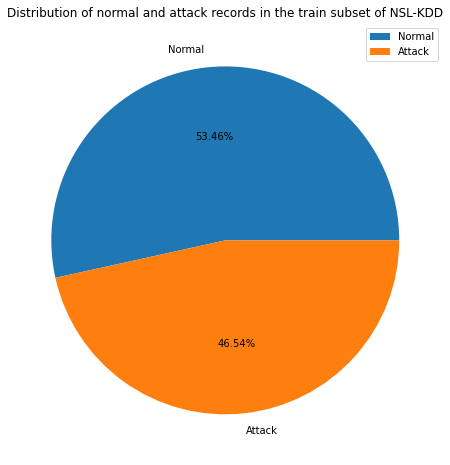

In [63]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8, 8))
plt.pie(train_Y.label.value_counts(), labels=['Normal','Attack'], autopct='%0.2f%%')
plt.title("Distribution of normal and attack records in the train subset of NSL-KDD")
plt.legend()
plt.show()

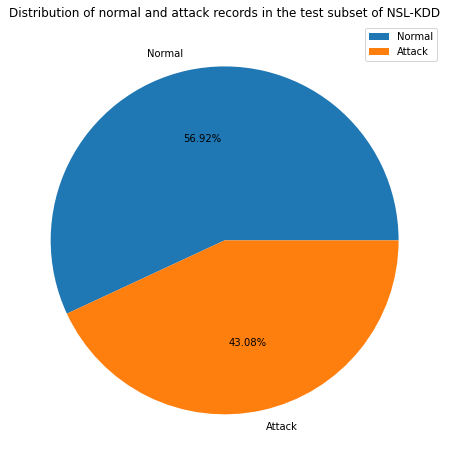

In [64]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8, 8))
plt.pie(test_Y.label.value_counts(), labels=['Normal','Attack'], autopct='%0.2f%%')
plt.title("Distribution of normal and attack records in the test subset of NSL-KDD")
plt.legend()
plt.show()

In [4]:
train_Y

,label
0,0
1,0
2,1
3,0
4,0
...,...
125968,1
125969,0
125970,0
125971,1


In [5]:
test_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_harvest,service_aol,service_http_8001,service_urh_i,service_http_2784,service_red_i
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_Y

,label
0,1
1,1
2,0
3,1
4,1
...,...
22539,0
22540,0
22541,1
22542,0


In [30]:
#now we make and test the neural networks
from tensorflow.python.keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import PReLU
act = PReLU(alpha_initializer='zeros', weights=None)
model = Sequential()
# define the NN architecture and activation function

model.add(Dense(248, input_dim=123))
model.add(Activation(act))
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd =SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics= ['accuracy'])
model.fit(train_X, train_Y, epochs=50, batch_size=100)

Epoch 1/50
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0248 - accuracy: 0.9917
Epoch 2/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0108 - accuracy: 0.9961
Epoch 3/50
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0085 - accuracy: 0.9968
Epoch 4/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 5/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0073 - accuracy: 0.9973
Epoch 6/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 0.9977
Epoch 7/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 0.9979
Epoch 8/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 0.9979
Epoch 9/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 10/50
1260/1260 [==============================] - 2s 1ms/step - loss: 0.004

In [31]:
#training accuracy
train_acc = model.evaluate(train_X, train_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], train_acc[1]*100))

accuracy: 99.94%


In [32]:
#calculate the test accuracy using evaluate function
test_acc = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], test_acc[1] * 100))

accuracy: 81.33%


In [33]:
from sklearn.metrics import accuracy_score

# or find the prediction accuracy using predict_classes (same as test accuracy)
y_pred = model.predict_classes(test_X)
pred_accuracy = accuracy_score(test_Y, y_pred)
pred_accuracy

0.8132540809084458

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Precision
precision = precision_score(test_Y, y_pred)
print('Precision : %f'% precision)

Precision : 0.930418


In [35]:
# Recall
recall = recall_score(test_Y, y_pred)
print('Recall: %f' % recall)

Recall: 0.726253


In [36]:
# f1-score
f1 = f1_score(test_Y, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.815755


In [37]:
roc = roc_auc_score(test_Y, y_pred)
print('ROC_AUC Score: %f' % roc)

ROC_AUC Score: 0.827239


In [38]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusionmatrix = confusion_matrix(test_Y, y_pred)
print(confusionmatrix)

[[9014  697]
 [3513 9320]]


In [39]:
# this is the original one written in the thesis, now let's try to change it a bit to get better results
#first save model
model.save("NSLKDD_binary_model1.h5")

In [42]:
from keras.models import load_model
model_loaded=load_model('NSLKDD_binary_model1.h5',custom_objects={'PReLU': PReLU})

In [43]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 248)               30752     
_________________________________________________________________
activation_5 (Activation)    (None, 248)               248       
_________________________________________________________________
dense_6 (Dense)              (None, 124)               30876     
_________________________________________________________________
activation_6 (Activation)    (None, 124)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8000      
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [8]:
#making another model
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import PReLU
act2 = PReLU(alpha_initializer='zeros', weights=None)
model2 = Sequential()
# define the NN architecture and activation function

model2.add(Dense(496, input_dim=123, activation=Activation(act2)))
model2.add(Dropout(0.1))
model2.add(Dense(248, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(124, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(62, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model2.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1969/1969 [==============================] - 16s 8ms/step - loss: 0.0420 - accuracy: 0.9858 - val_loss: 0.9297 - val_accuracy: 0.8046
Epoch 2/100
1969/1969 [==============================] - 22s 11ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.8023 - val_accuracy: 0.8368
Epoch 3/100
1969/1969 [==============================] - 18s 9ms/step - loss: 0.0103 - accuracy: 0.9963 - val_loss: 0.7848 - val_accuracy: 0.8302
Epoch 4/100
1969/1969 [==============================] - 21s 11ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 1.0533 - val_accuracy: 0.8217
Epoch 5/100
1969/1969 [==============================] - 21s 11ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 1.2283 - val_accuracy: 0.7996
Epoch 6/100
1969/1969 [==============================] - 16s 8ms/step - loss: 0.0074 - accuracy: 0.9972 - val_loss: 1.1250 - val_accuracy: 0.8155
Epoch 7/100
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0071 - accuracy: 0.9973 - val_loss: 0.88

In [9]:
#training accuracy
train_acc2 = model2.evaluate(train_X, train_Y, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], train_acc2[1]*100))

accuracy: 99.77%


In [10]:
#calculate the test accuracy using evaluate function
test_acc2 = model2.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], test_acc2[1] * 100))

accuracy: 82.44%


In [12]:
from sklearn.metrics import accuracy_score
# or find the prediction accuracy using predict_classes (same as test accuracy)
y_pred2 = model2.predict_classes(test_X)
pred_accuracy2 = accuracy_score(test_Y, y_pred2)
pred_accuracy2

0.8244322214336409

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Precision
precision2 = precision_score(test_Y, y_pred2)
print('Precision : %f'% precision2)

Precision : 0.935092


In [14]:
# Recall
recall2 = recall_score(test_Y, y_pred2)
print('Recall: %f' % recall2)

Recall: 0.743162


In [15]:
# f1-score
f1_2 = f1_score(test_Y, y_pred2)
print('F1 score: %f' % f1_2)

F1 score: 0.828152


In [16]:
roc2 = roc_auc_score(test_Y, y_pred2)
print('ROC_AUC Score: %f' % roc2)

ROC_AUC Score: 0.837496


In [17]:
from sklearn.metrics import confusion_matrix

# confusion matrix
confusionmatrix2 = confusion_matrix(test_Y, y_pred2)
print(confusionmatrix2)

[[9049  662]
 [3296 9537]]


In [18]:
tn2, fp2, fn2, tp2 = confusionmatrix2.ravel()
(tn2, fp2, fn2, tp2)

(9049, 662, 3296, 9537)

In [19]:
#false positive rate
FPR2 = fp2 / (fp2 + tn2)
FPR2 * 100

6.817011636288744

In [20]:
FNR2 = fn2/(tp2+fn2)
FNR2*100

25.683783994389465

In [21]:
ds_train = pd.concat([train_X, train_Y], axis=1)

In [22]:
ds_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
ds_test = pd.concat([test_X, test_Y], axis=1)

In [24]:
ds_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S3,flag_SF,flag_SH,service_harvest,service_aol,service_http_8001,service_urh_i,service_http_2784,service_red_i,label
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22540,0.000000,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22541,0.000000,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
22542,0.000000,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
ds=pd.concat([ds_train,ds_test],axis=0)
ds

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,1.263815e-05,2.474131e-04,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
22540,0.0,5.045710e-06,6.969174e-04,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
22541,0.0,8.681168e-04,6.177155e-03,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
22542,0.0,6.685168e-07,3.120526e-05,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [32]:
from pycaret.classification import *
dsp_tr=setup(data = ds,
             target = 'label',train_size=0.8,
             silent = True, fold_shuffle=True,preprocess=False)

,Description,Value
0,session_id,4427
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(148517, 124)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,89
8,Transformed Train Set,"(118813, 123)"
9,Transformed Test Set,"(29704, 123)"


In [33]:
X_train2=get_config('X_train')
Y_train2 = get_config('y_train')
Y_test2 = get_config('y_test')
X_test2 = get_config('X_test')

In [34]:
X_train2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
97806,0.317843,7.246567e-10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12619,0.138387,0.000000e+00,3.269122e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115136,0.000000,7.246567e-10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47135,0.000000,3.260955e-08,1.038218e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95702,0.000000,2.173970e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54377,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39962,0.000629,2.246436e-08,2.366525e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
60894,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28653,0.000000,3.768214e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X_test2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
5860,0.000000,4.997959e-06,1.442129e-03,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29229,0.000023,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9699,0.000000,3.183413e-06,2.169509e-04,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70804,0.000000,6.688581e-07,2.580276e-07,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
121471,0.000000,1.623231e-07,4.451358e-06,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19178,0.000000,0.000000e+00,3.269122e-05,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99335,0.000000,5.652322e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14751,0.000000,1.957799e-06,1.292789e-04,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10066,0.000000,5.157130e-06,1.046862e-03,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
Y_train2

array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)

In [41]:
X_train2 = np.asarray(X_train2).astype(np.float32)
Y_train2 = np.asarray(Y_train2).astype(np.float32)
X_train2

array([[3.1784284e-01, 7.2465667e-10, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3838691e-01, 0.0000000e+00, 3.2691223e-05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.2465667e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.7682145e-07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.0035094e-07, 8.3957006e-05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [43]:
X_test2 = np.asarray(X_test2).astype(np.float32)
Y_test2 = np.asarray(Y_test2).astype(np.float32)

In [44]:
act3 = PReLU(alpha_initializer='zeros', weights=None)
model3 = Sequential()
# define the NN architecture and activation function

model3.add(Dense(496, input_dim=123, activation=Activation(act3)))
model3.add(Dropout(0.1))
model3.add(Dense(248, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(124, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(62, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

sgd =SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='binary_crossentropy', optimizer=sgd, metrics= ['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001,patience=5) ## early stopping
model3.fit(X_train2, Y_train2, validation_data=(X_test2, Y_test2), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1857/1857 [==============================] - 7s 4ms/step - loss: 0.0614 - accuracy: 0.9793 - val_loss: 0.0251 - val_accuracy: 0.9916
Epoch 2/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9918 - val_loss: 0.0169 - val_accuracy: 0.9935
Epoch 3/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9935 - val_loss: 0.0131 - val_accuracy: 0.9953
Epoch 4/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 0.0130 - val_accuracy: 0.9957
Epoch 5/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0154 - val_accuracy: 0.9945
Epoch 6/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0102 - val_accuracy: 0.9968
Epoch 7/100
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 0.0090 - val_ac

In [45]:
train_acc3 = model3.evaluate(X_train2, Y_train2, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], train_acc3[1]*100))

accuracy: 99.76%


In [46]:
#calculate the test accuracy using evaluate function
test_acc3 = model3.evaluate(X_test2, Y_test2, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], test_acc3[1] * 100))

accuracy: 99.72%


In [47]:
y_pred3 = model3.predict_classes(X_test2)

In [48]:
confusionmatrix3 = confusion_matrix(Y_test2, y_pred3)
print(confusionmatrix3)

[[15371    52]
 [   32 14249]]


In [49]:
# Precision
precision3 = precision_score(Y_test2, y_pred3)
print('Precision : %f' % precision3)

Precision : 0.996364


In [50]:
# Recall
recall3 = recall_score(Y_test2, y_pred3)
print('Recall: %f' % recall3)


Recall: 0.997759


In [51]:

f1_3 = f1_score(Y_test2, y_pred3)
print('F1 score: %f' % f1_3)

F1 score: 0.997061


In [52]:

roc3 = roc_auc_score(Y_test2, y_pred3)
print('ROC_AUC Score: %f' % roc3)

ROC_AUC Score: 0.997194


In [53]:
tn3, fp3, fn3, tp3 = confusionmatrix3.ravel()
(tn3, fp3, fn3, tp3)

(15371, 52, 32, 14249)

In [54]:
FPR3 = fp3 / (fp3 + tn3)
FPR3 * 100

0.3371587888218894

In [55]:
FNR3= fn3/(tp3+fn3)
FNR3*100
#this was the fourth experiment for binary nslkdd and was the best result

0.22407394440165257

In [58]:
#just trying something
X=[0,0.9920,1]
Y=[0,0.0244,1]
AUC=np.trapz(X,Y)
AUC

0.9838

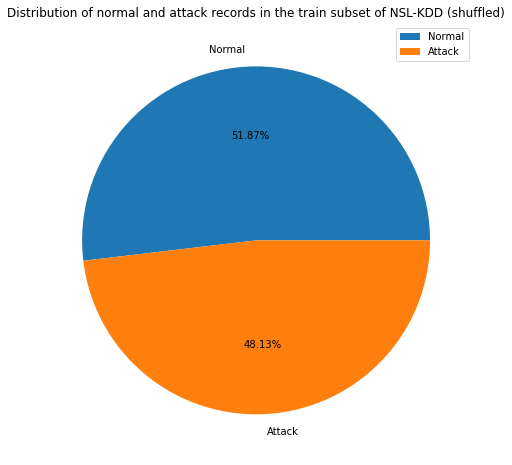

In [84]:
plt.figure(figsize=(8, 8))
plt.pie(pd.value_counts(Y_train2), labels=['Normal','Attack'], autopct='%0.2f%%')
plt.title("Distribution of normal and attack records in the train subset of NSL-KDD (shuffled)")
plt.legend()
plt.show()

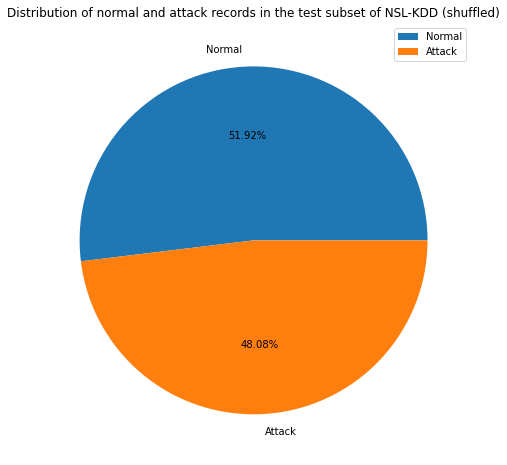

In [83]:
plt.figure(figsize=(8, 8))
plt.pie(pd.value_counts(Y_test2), labels=['Normal','Attack'], autopct='%0.2f%%')
plt.title("Distribution of normal and attack records in the test subset of NSL-KDD (shuffled)")
plt.legend()
plt.show()

In [85]:
pred=model3.predict(X_test2)

rocc = roc_auc_score(Y_test2, pred)
print('ROC_AUC Score: %f' % rocc)

ROC_AUC Score: 0.999949


In [86]:
FPR3

0.003371587888218894